<a href="https://colab.research.google.com/github/Akshaya1409/EDA-on-Youtube-Dataset/blob/main/EDA_on_the_Youtube_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Exploratory Data Analysis on Youtube dataset

Importing the necessary libraries


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the csv file

In [52]:
df_youtube=pd.read_csv("train.csv") # Import the dataset
df_youtube.head(3)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22.0,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24.0,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23.0,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN


**Basic Dataset Exploration**

In [53]:
df_youtube.shape

(3198, 19)

In [54]:
#information about data
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   float64
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3046 non-null   object 
 6   description            3133 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          3198 non-null   object 
 11  comment_disabled       3198 non-null   object 
 12  like dislike disabled  3198 non-null   object 
 13  likes                  3198 non-null   object 
 14  dislike                3198 non-null   object 
 15  tag 

In [55]:
df_youtube.dtypes  #information about the datatypes available in the dataset

Video_id                  object
category_id              float64
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title      object
views                     object
Unnamed: 17              float64
Unnamed: 18               object
dtype: object

In [56]:
df_youtube.describe()

,category_id,subscriber,Trend_day_count,Unnamed: 17
count,3192.000000,3.175000e+03,3197.000000,1.0
mean,20.360276,3.823981e+06,7.964342,2544.0
std,7.333778,2.865771e+07,78.556055,NaN
min,1.000000,0.000000e+00,0.000000,2544.0
25%,17.000000,2.428800e+05,4.000000,2544.0
50%,24.000000,1.241220e+06,7.000000,2544.0
75%,25.000000,3.812622e+06,10.000000,2544.0
max,43.000000,1.576229e+09,4444.000000,2544.0


In [57]:
df_youtube.isnull().sum()   # checking for missing values in the columns

Video_id                    0
category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

*From the above description,there are two unnamed columns.These columns can be dropped as they can not be used for further analysis*

In [58]:
#dropping the two Unnamed columns
df_youtube.drop('Unnamed: 18', inplace=True, axis=1)

In [59]:
df_youtube.drop('Unnamed: 17', inplace=True, axis=1)

In [60]:
df_youtube.info()   # to check whether the Unnamed columns have been removed permanently


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   float64
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3046 non-null   object 
 6   description            3133 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          3198 non-null   object 
 11  comment_disabled       3198 non-null   object 
 12  like dislike disabled  3198 non-null   object 
 13  likes                  3198 non-null   object 
 14  dislike                3198 non-null   object 
 15  tag 

In [61]:
df_youtube.isnull().sum()  # Again checking for null values in the dataset and dropping the rows that has mininum null values

Video_id                   0
category_id                6
channel_title              3
subscriber                23
title                      3
tags                     152
description               65
Trend_day_count            1
Tag_count                  1
Trend_tag_count            1
comment_count              0
comment_disabled           0
like dislike disabled      0
likes                      0
dislike                    0
tag appered in title       1
views                      0
dtype: int64

In [62]:
df_youtube= df_youtube.dropna(subset=['Tag_count','Trend_tag_count','tag appered in title',"Trend_day_count"])
print(df_youtube)

        Video_id  category_id  ... tag appered in title    views
0      HDR9SQc79         22.0  ...                False  1978978
1     KNH52UF?48         24.0  ...                False  1487870
2     QTW28IRG36         23.0  ...                 True  1502102
3     MGL76WI]26         24.0  ...                 True  3519302
4     TWP93KXT70         24.0  ...                 True  4835374
...          ...          ...  ...                  ...      ...
3193  OKR48DOE67         20.0  ...                False   747960
3194  QJK69DS?91         10.0  ...                 True   200410
3195  VHF51NVr11         10.0  ...                 True   244022
3196  XHU22OAJ39         26.0  ...                 True   907340
3197  IFD79NSG47         22.0  ...                 True   465531

[3194 rows x 17 columns]


In [63]:
#Tag_count,Trend_tag_count,tag appered in title,Trend_day_count's null values have been removed
df_youtube.isnull().sum()

Video_id                   0
category_id                6
channel_title              3
subscriber                23
title                      2
tags                     151
description               65
Trend_day_count            0
Tag_count                  0
Trend_tag_count            0
comment_count              0
comment_disabled           0
like dislike disabled      0
likes                      0
dislike                    0
tag appered in title       0
views                      0
dtype: int64

***Checking for duplicates in the dataset***

In [64]:
df_youtube.duplicated(subset=None, keep='first')
# No Duplicates have been found

0       False
1       False
2       False
3       False
4       False
        ...  
3193    False
3194    False
3195    False
3196    False
3197    False
Length: 3194, dtype: bool

As **["comment_disabled"]** and  **["like dislike disabled"]** are categorical variables these can be converted into **indicator variable** using *pd.get_dummies()*

In [65]:
dummy=pd.get_dummies(df_youtube['comment_disabled'],prefix="Comment_disabled")
# turns the column comment_disabled into a dummy
dummy

,Comment_disabled_FALSE,Comment_disabled_TRUE
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
3193,1,0
3194,1,0
3195,1,0
3196,0,1


In [66]:
#merging the dummy variables/DataFrame into our original dataframe df_youtube
df_youtube=df_youtube.merge(dummy,left_index=True,right_index=True)
df_youtube

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Comment_disabled_FALSE,Comment_disabled_TRUE
0,HDR9SQc79,22.0,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,1,0
1,KNH52UF?48,24.0,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,0,1
2,QTW28IRG36,23.0,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,0,1
3,MGL76WI]26,24.0,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,0,1
4,TWP93KXT70,24.0,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,OKR48DOE67,20.0,EA SPORTS FIFA,3150213.0,FIFA 18 - FUT Champions Cup Barcelona - Day 1,fifa|fifa ultimate team|fut|fifa pack opening|...,Day 1 of the FUT Champions Cup Barcelona featu...,7.0,20,5,,FALSE,FALSE,9734,5912,False,747960,1,0
3194,QJK69DS?91,10.0,JackWhiteVEVO,261596.0,Jack White - Corporation (Audio),Alternative|Corporation|Jack White|Third Man R...,“Corporation” by Jack White from the forthcomi...,7.0,8,6,,FALSE,FALSE,16006,12019,True,200410,1,0
3195,VHF51NVr11,10.0,JamesBlakeVEVO,28321.0,James Blake - If The Car Beside You Moves Ahea...,James|Blake|If|The|Car|Beside|You|Moves|Ahead|...,If the car beside you moves ahead \nAs much as...,11.0,15,4,,FALSE,TRUE,0,0,True,244022,1,0
3196,XHU22OAJ39,26.0,Refinery29,890739.0,Lucie Fink Trains Like A Professional Gymnast ...,refinery29|refinery 29|r29|r29 video|refinery2...,"On this episode of Lucie For Hire, our host Lu...",11.0,14,6,250750,TRUE,FALSE,6859,1247,True,907340,0,1


In [67]:
dum=pd.get_dummies(df_youtube['like dislike disabled'],prefix='likedislike_disabled')
dum

,likedislike_disabled_FALSE,likedislike_disabled_TRUE
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
3193,1,0
3194,1,0
3195,0,1
3196,1,0


In [68]:
df_youtube=df_youtube.merge(dum,left_index=True,right_index=True)
df_youtube.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Comment_disabled_FALSE,Comment_disabled_TRUE,likedislike_disabled_FALSE,likedislike_disabled_TRUE
0,HDR9SQc79,22.0,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,1,0,1,0
1,KNH52UF?48,24.0,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,0,1,1,0
2,QTW28IRG36,23.0,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,0,1,0,1
3,MGL76WI]26,24.0,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,0,1,0,1
4,TWP93KXT70,24.0,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,0,1,0,1


In [69]:
#dropping the comment_disabled column 
df_youtube.drop('comment_disabled', inplace=True, axis=1)
df_youtube.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,like dislike disabled,likes,dislike,tag appered in title,views,Comment_disabled_FALSE,Comment_disabled_TRUE,likedislike_disabled_FALSE,likedislike_disabled_TRUE
0,HDR9SQc79,22.0,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,13342,6089,False,1978978,1,0,1,0
1,KNH52UF?48,24.0,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,FALSE,5761,3044,False,1487870,0,1,1,0
2,QTW28IRG36,23.0,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,0,0,True,1502102,0,1,0,1
3,MGL76WI]26,24.0,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,0,0,True,3519302,0,1,0,1
4,TWP93KXT70,24.0,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,0,0,True,4835374,0,1,0,1


In [70]:
#Dropping the like dislike disabled column
df_youtube.drop('like dislike disabled', inplace=True, axis=1)
df_youtube.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,tag appered in title,views,Comment_disabled_FALSE,Comment_disabled_TRUE,likedislike_disabled_FALSE,likedislike_disabled_TRUE
0,HDR9SQc79,22.0,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,13342,6089,False,1978978,1,0,1,0
1,KNH52UF?48,24.0,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,5761,3044,False,1487870,0,1,1,0
2,QTW28IRG36,23.0,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,0,0,True,1502102,0,1,0,1
3,MGL76WI]26,24.0,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,0,0,True,3519302,0,1,0,1
4,TWP93KXT70,24.0,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,0,0,True,4835374,0,1,0,1


***Finding the correaltion among the variables***

In [71]:
df_youtube.corr()

,category_id,subscriber,Trend_day_count,Comment_disabled_FALSE,Comment_disabled_TRUE,likedislike_disabled_FALSE,likedislike_disabled_TRUE
category_id,1.000000,0.006697,0.011226,0.026281,-0.026281,0.025324,-0.025324
subscriber,0.006697,1.000000,-0.001422,-0.018812,0.018812,-0.025657,0.025657
Trend_day_count,0.011226,-0.001422,1.000000,-0.012538,0.012538,0.009940,-0.009940
Comment_disabled_FALSE,0.026281,-0.018812,-0.012538,1.000000,-1.000000,-0.006268,0.006268
Comment_disabled_TRUE,-0.026281,0.018812,0.012538,-1.000000,1.000000,0.006268,-0.006268
likedislike_disabled_FALSE,0.025324,-0.025657,0.009940,-0.006268,0.006268,1.000000,-1.000000
likedislike_disabled_TRUE,-0.025324,0.025657,-0.009940,0.006268,-0.006268,-1.000000,1.000000


In [72]:
df_youtube.dtypes   # Again most of the variables are in object datatype

Video_id                       object
category_id                   float64
channel_title                  object
subscriber                    float64
title                          object
tags                           object
description                    object
Trend_day_count               float64
Tag_count                      object
Trend_tag_count                object
comment_count                  object
likes                          object
dislike                        object
tag appered in title           object
views                          object
Comment_disabled_FALSE          uint8
Comment_disabled_TRUE           uint8
likedislike_disabled_FALSE      uint8
likedislike_disabled_TRUE       uint8
dtype: object

In [73]:
#converting the variables to int from object 
df_youtube['likes'].astype(str).astype(int)
# astype() is used for temporary datatype conversion 

0       13342
1        5761
2           0
3           0
4           0
        ...  
3193     9734
3194    16006
3195        0
3196     6859
3197     8339
Name: likes, Length: 3194, dtype: int64

In [74]:
df_youtube.dtypes

Video_id                       object
category_id                   float64
channel_title                  object
subscriber                    float64
title                          object
tags                           object
description                    object
Trend_day_count               float64
Tag_count                      object
Trend_tag_count                object
comment_count                  object
likes                          object
dislike                        object
tag appered in title           object
views                          object
Comment_disabled_FALSE          uint8
Comment_disabled_TRUE           uint8
likedislike_disabled_FALSE      uint8
likedislike_disabled_TRUE       uint8
dtype: object

Converting object datatype to int/float datatype

In [75]:
df_youtube['likes']=pd.to_numeric(df_youtube['likes'])
df_youtube.dtypes

Video_id                       object
category_id                   float64
channel_title                  object
subscriber                    float64
title                          object
tags                           object
description                    object
Trend_day_count               float64
Tag_count                      object
Trend_tag_count                object
comment_count                  object
likes                           int64
dislike                        object
tag appered in title           object
views                          object
Comment_disabled_FALSE          uint8
Comment_disabled_TRUE           uint8
likedislike_disabled_FALSE      uint8
likedislike_disabled_TRUE       uint8
dtype: object

In [76]:
df_youtube['dislike']=pd.to_numeric(df_youtube['dislike'])
df_youtube.dtypes

Video_id                       object
category_id                   float64
channel_title                  object
subscriber                    float64
title                          object
tags                           object
description                    object
Trend_day_count               float64
Tag_count                      object
Trend_tag_count                object
comment_count                  object
likes                           int64
dislike                         int64
tag appered in title           object
views                          object
Comment_disabled_FALSE          uint8
Comment_disabled_TRUE           uint8
likedislike_disabled_FALSE      uint8
likedislike_disabled_TRUE       uint8
dtype: object

In [77]:
df_youtube.corr() # As likes and dislikes have been converted to int datatype we can find their correlation  with other variables

,category_id,subscriber,Trend_day_count,likes,dislike,Comment_disabled_FALSE,Comment_disabled_TRUE,likedislike_disabled_FALSE,likedislike_disabled_TRUE
category_id,1.000000,0.006697,0.011226,0.011532,0.024785,0.026281,-0.026281,0.025324,-0.025324
subscriber,0.006697,1.000000,-0.001422,-0.008799,-0.019772,-0.018812,0.018812,-0.025657,0.025657
Trend_day_count,0.011226,-0.001422,1.000000,0.002023,0.006942,-0.012538,0.012538,0.009940,-0.009940
likes,0.011532,-0.008799,0.002023,1.000000,0.297060,-0.018220,0.018220,0.260863,-0.260863
dislike,0.024785,-0.019772,0.006942,0.297060,1.000000,-0.019105,0.019105,0.712441,-0.712441
Comment_disabled_FALSE,0.026281,-0.018812,-0.012538,-0.018220,-0.019105,1.000000,-1.000000,-0.006268,0.006268
Comment_disabled_TRUE,-0.026281,0.018812,0.012538,0.018220,0.019105,-1.000000,1.000000,0.006268,-0.006268
likedislike_disabled_FALSE,0.025324,-0.025657,0.009940,0.260863,0.712441,-0.006268,0.006268,1.000000,-1.000000
likedislike_disabled_TRUE,-0.025324,0.025657,-0.009940,-0.260863,-0.712441,0.006268,-0.006268,-1.000000,1.000000


From the correlation table we can find that there is not really any correlation between variables.

In [78]:
df_youtube['views']=pd.to_numeric(df_youtube['views'],errors='coerce').convert_dtypes() 
df_youtube.dtypes #similarly converting views from object to int

Video_id                       object
category_id                   float64
channel_title                  object
subscriber                    float64
title                          object
tags                           object
description                    object
Trend_day_count               float64
Tag_count                      object
Trend_tag_count                object
comment_count                  object
likes                           int64
dislike                         int64
tag appered in title           object
views                           Int64
Comment_disabled_FALSE          uint8
Comment_disabled_TRUE           uint8
likedislike_disabled_FALSE      uint8
likedislike_disabled_TRUE       uint8
dtype: object

In [79]:
# As Comment_disabled_FALSE and Comment_disabled_TRUE	are the dummies derived from comment_disabled.Hence any of the one can be dropped
df_youtube.drop('likedislike_disabled_TRUE', inplace=True, axis=1)
#similarly Comment_disabled_FALSE also have been dropped

In [80]:
df_youtube.drop('Comment_disabled_FALSE', inplace=True, axis=1)

In [81]:
df_youtube.dtypes
# changes has been reflected

Video_id                       object
category_id                   float64
channel_title                  object
subscriber                    float64
title                          object
tags                           object
description                    object
Trend_day_count               float64
Tag_count                      object
Trend_tag_count                object
comment_count                  object
likes                           int64
dislike                         int64
tag appered in title           object
views                           Int64
Comment_disabled_TRUE           uint8
likedislike_disabled_FALSE      uint8
dtype: object

**From the above we can find that likes,dislike and views has been changed to int datatype**

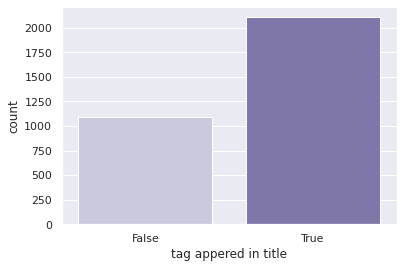

In [82]:
sns.set_style("darkgrid")
sns.set_context("notebook")

sns.countplot(x="tag appered in title", data=df_youtube,palette="Purples");

# From this we can understand that most of the tags have been appeared on the videos

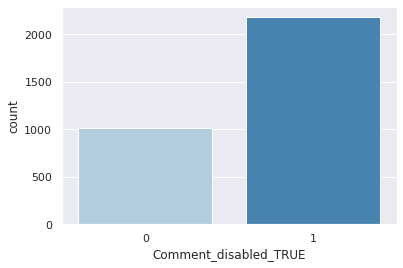

In [83]:
sns.set_style("darkgrid")
sns.set_context("notebook")
sns.countplot(x="Comment_disabled_TRUE", data=df_youtube,palette="Blues");
# The Below plot shows that most of the videos on the youtube have their comments disabled.

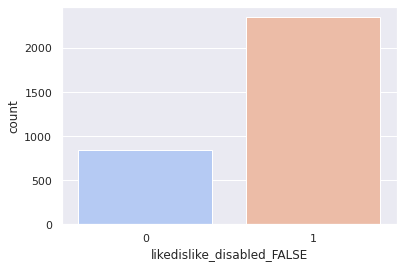

In [84]:
sns.set_style("darkgrid")
sns.set_context("notebook")
sns.countplot(x="likedislike_disabled_FALSE", data=df_youtube,palette="coolwarm");
# Similarly the Below boxplot shows that most of the videos on the youtube have not disabled likes and dislikes button

-0.008799257152372198


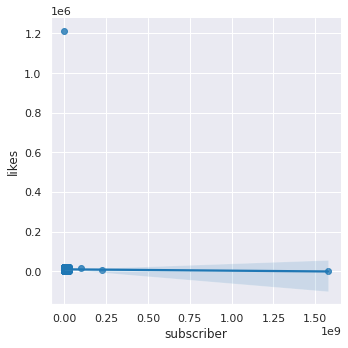

In [85]:
#Plotting the correaltion between Subscriber and likes of the channel 
sns.set_context("notebook")
cor_df=df_youtube.corr()
print(cor_df.loc["subscriber", "likes"])
sns.lmplot(x="subscriber",y="likes",data=df_youtube)

# there is no correlation between subscriber and likes

0.7124411013158096


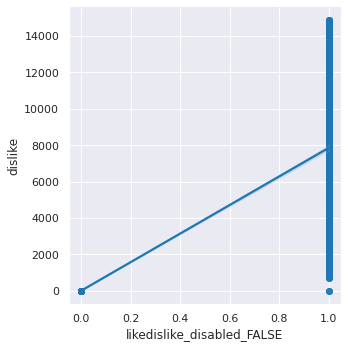

In [86]:
sns.set_context("notebook")
cor_df=df_youtube.corr()
print(cor_df.loc["dislike", "likedislike_disabled_FALSE"])
sns.lmplot(x="likedislike_disabled_FALSE",y="dislike",data=df_youtube)   
  # likedislike_disabled_FALSE and dislike has good correlation among them

### Inferences from the dataset

**1.Most Viewed videos on youtube**

In [87]:
most_viewed=df_youtube.sort_values('views',ascending=False)[:5]
#Sorts the views column in Descending order,the top 5 fields are taken stored in most_viewed variable
most_viewed[['channel_title','title','views']]
# As we can see that the video "Nick Andopolis: Drummer" has the most views on youtube 

,channel_title,title,views
29,FaeryInLoveInc,Nick Andopolis: Drummer,989873537
2379,TheReportOfTheWeek,Checking Out the New McDonald’s Dollar Menu,598795075
1476,The Late Show with Stephen Colbert,Tom Hanks And Stephen Argue Christmas Tree Tec...,100360000
1882,Foot Locker,Foot Locker x Jordan - “#BoldLikeKawhi” feat. ...,30039119
1590,Ed Sheeran,Ed Sheeran - Perfect Symphony (with Andrea Boc...,6433327


**Visualizing the most viewed Video on Youtube**

Text(0.5, 1.0, 'Most viewed vidoes on youtube')

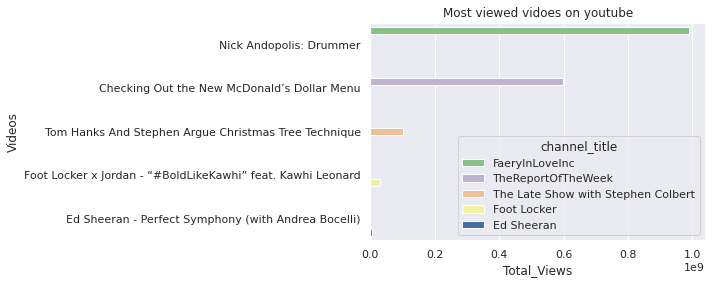

In [88]:
sns.set_style("darkgrid") #setting the style
sns.set_context("notebook")
sns.barplot(x='views',y="title",hue="channel_title",data=most_viewed,palette="Accent")  # using seaborn Library 
plt.xlabel("Total_Views")
plt.ylabel("Videos")
plt.title("Most viewed vidoes on youtube")


**2.Most Liked Videos on Youtube**

In [89]:
#Most Liked Videos on Youtube-Top 7
most_liked=df_youtube.sort_values('likes',ascending=False)[:7]
most_liked[['channel_title','title','subscriber','likes']]
# "I Picked My Girlfriend's Outfit Blindfolded" video	has the most likes 

,channel_title,title,subscriber,likes
154,Tyler Williams,I Picked My Girlfriend's Outfit Blindfolded,547671.0,1213628
2349,Adam Whitley,Gas Mask Scene | Kong: Skull Island (2017),72.0,23843
2921,Rita Ora,Rita Ora - Proud (Official Audio),530742.0,23815
2512,FC Barcelona,MOVE OF THE WEEK #5 | Messi’s amazing goal in ...,3938715.0,23768
3114,TheReportOfTheWeek,Are Taco Bell's Nacho Fries Worth the Hype?,770330.0,23667
814,ElleOfTheMills,COMING OUT (ELLE MILLS STYLE),1121792.0,23308
389,K Yuen,Transparent: YAS QUEEN,51.0,23288


**Visualizing Top 7 Liked videos on youtube**

Text(0.5, 1.0, 'Most Liked vidoes on youtube')

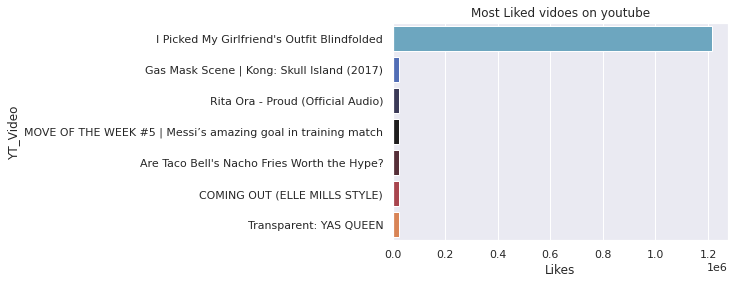

In [90]:
sns.set_style("darkgrid")
sns.set_context("notebook")
sns.barplot(x='likes',y="title",data=most_liked,palette="icefire")
plt.xlabel("Likes")
plt.ylabel("YT_Video")
plt.title("Most Liked vidoes on youtube")


**3.Most Disliked videos on youtube**

In [91]:
# Top 7 disliked  youtube videos 
most_disliked=df_youtube.sort_values('dislike',ascending=False)[:7]
most_disliked[['channel_title','title','subscriber','dislike']]

,channel_title,title,subscriber,dislike
1091,ESPN,Urban Meyer reacts to Ohio State not making th...,2702088.0,14858
987,NBA,NBA Meme Team - Top 5,8707071.0,14852
2080,SMTOWN,[STATION] SMTOWN 'Dear My Family (Live Concert...,13551673.0,14849
634,DreamCastle_629,How to turn your car crash into a catchy song,50.0,14833
2880,Car Throttle,The Most Expensive Countries To Buy Cool Used ...,1956651.0,14803
1268,TheEllenShow,Gwen Stefani Talks Moving in with Blake Shelton,23760020.0,14780
3124,ESPN,WWE's Vince McMahon announces he will relaunch...,2702088.0,14773


**Visualizing Top Disliked videos on youtube**

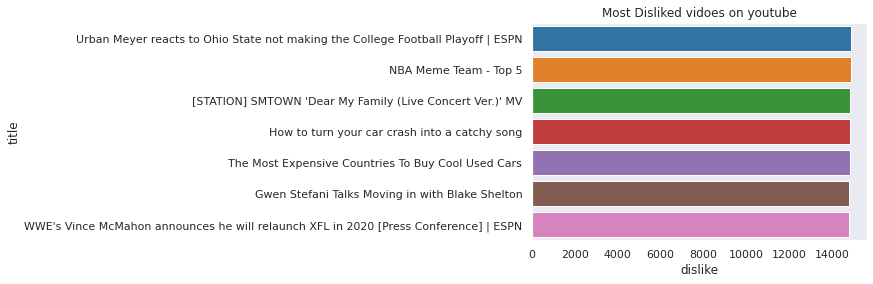

In [92]:
sns.set_style("dark")
sns.set_context("notebook")
plt.xlabel("Dislike_count")
plt.ylabel("YT_Videos")
plt.title("Most Disliked vidoes on youtube")
sns.barplot(x='dislike',y="title",data=most_disliked)
# Since Barplot does not give us a better insight 

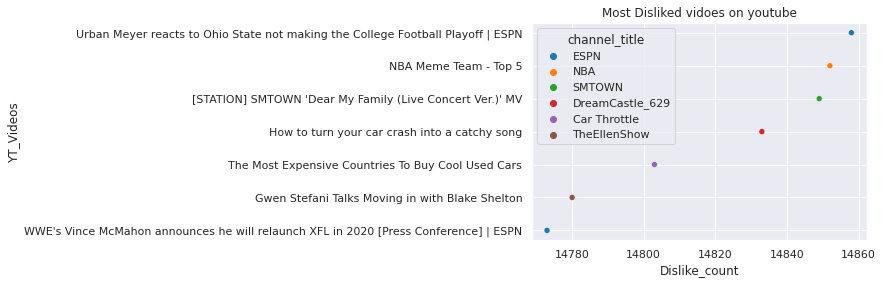

In [93]:
#Scatterplot has been used
sns.set_style("darkgrid")
sns.set_context("notebook")
plt.xlabel("Dislike_count")
plt.ylabel("YT_Videos")
plt.title("Most Disliked vidoes on youtube")

sns.scatterplot(x='dislike',y="title",hue="channel_title",data=most_disliked)